In [1]:
%matplotlib inline

# importing libraries  
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

pd.options.display.float_format = '{:,.2f}'.format

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioLab as pl

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers = ['SPY.US', 'CSPX.LSE']
ETF_Tickers =['SPY', 'CSPX']

ETFs2 = pd.DataFrame()

# Download
for ticker in Tickers:
    try:
        url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
        ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
        ETFs2 = ETFs2.merge(ETF, left_index = True, right_index = True, how='outer')
    except:
        print('Download of fund ' + ticker + ' failed')
    
ETFs2.columns = ETF_Tickers
ETFs2 = ETFs2.fillna(method='ffill')
ETFs2 = ETFs2.replace(to_replace=0, method='ffill')

ETFs2 = ETFs2.loc['2000-07-07':]

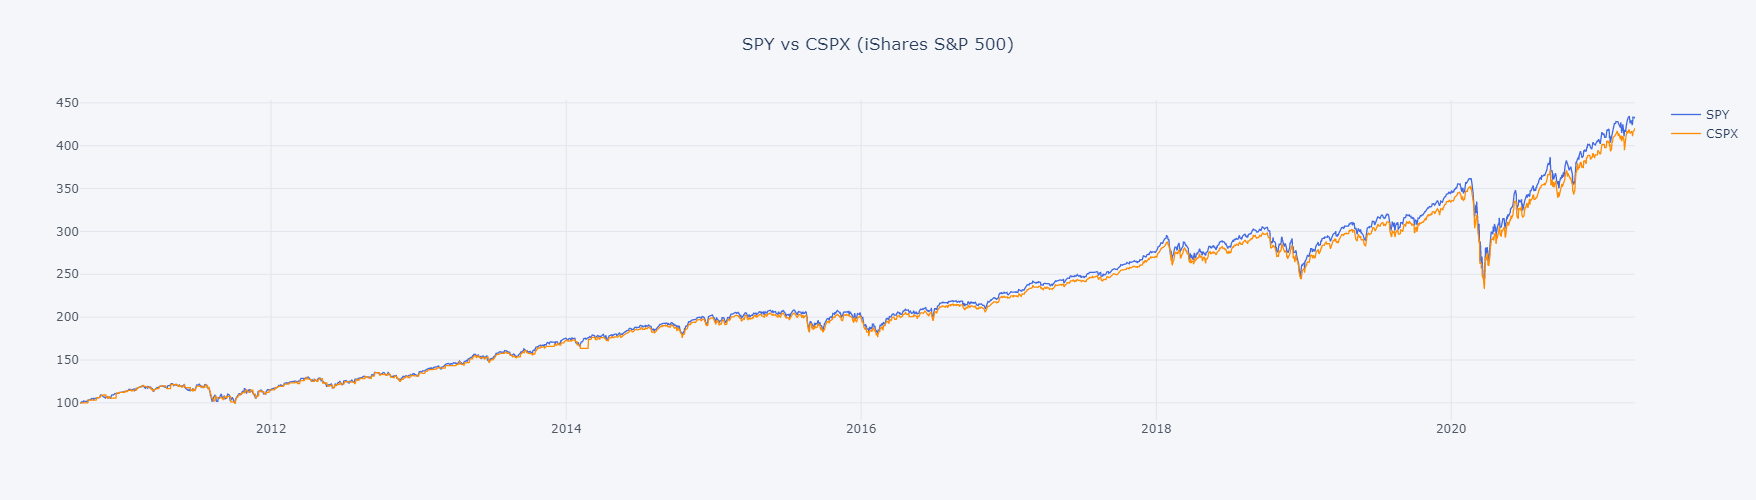

In [15]:
fundos = pl.normalize(ETFs2.dropna())
pl.ichart(fundos, title='SPY vs CSPX (iShares S&P 500)', colab=False, logo=True)

In [10]:
pl.compute_performance_table(fundos)

**Performance from 2010-09-15 to 2021-03-31 (≈ 10.5 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
SPY,14.92%,333.64%,16.89%,0.88,-33.72%,0.44
CSPX,14.58%,320.52%,15.41%,0.95,-33.90%,0.43


In [11]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF